In [13]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager
import matplotlib.pyplot as plt
import pandas as pd

In [14]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

In [16]:
# Visit the website
# https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html

url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)

In [17]:
# Create a Beautiful Soup Object

html = browser.html
new_object_soup = soup(html, 'html.parser')

In [18]:
# Extract all rows of data

temps_tbl = new_object_soup.find('tbody')
temps_hdr = temps_tbl.find_all('th')
temps = temps_tbl.find_all('tr', class_='data-row')
header_list = []
for each in temps_hdr:
    header_list.append(each.text)

In [19]:
# Create an empty list
temp_list = []
# Loop through the scraped data to create a list of rows
for temp in temps:
    temp_row = []
    for data in temp.find_all('td'):
        temp_row.append(data.text)
    temp_list.append(temp_row)


In [20]:
df = pd.DataFrame(temp_list, columns=header_list)
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [21]:
# Examine data type of each column

df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [22]:
# Change data types for data analysis

df['id'] = pd.to_numeric(df['id'], downcast='integer')
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])
df['sol'] = pd.to_numeric(df['sol'], downcast='integer')
df['ls'] = pd.to_numeric(df['ls'], downcast='integer')
df['month'] = pd.to_numeric(df['month'], downcast='integer')
df['min_temp'] = pd.to_numeric(df['min_temp'], downcast='float')
df['pressure'] = pd.to_numeric(df['pressure'], downcast='float')

In [23]:
# Confirm type changes were successful by examining data types again

df.dtypes

id                           int16
terrestrial_date    datetime64[ns]
sol                          int16
ls                           int16
month                         int8
min_temp                   float32
pressure                   float32
dtype: object

In [24]:
# 1. How many months are there on Mars?

mars_months = df.groupby('month')
mars_months['id'].count()

month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: id, dtype: int64

In [25]:
# 2. How many Martian days' worth of data are there?

df['id'].count()

1867

In [26]:
# 3. What is the average low temperature by month?
month_avg_low_temp = mars_months['min_temp'].mean()
month_avg_low_temp

month
1    -77.160919
2    -79.932587
3    -83.307289
4    -82.747421
5    -79.308723
6    -75.299316
7    -72.281693
8    -68.382980
9    -69.171638
10   -71.982140
11   -71.985504
12   -74.451805
Name: min_temp, dtype: float32

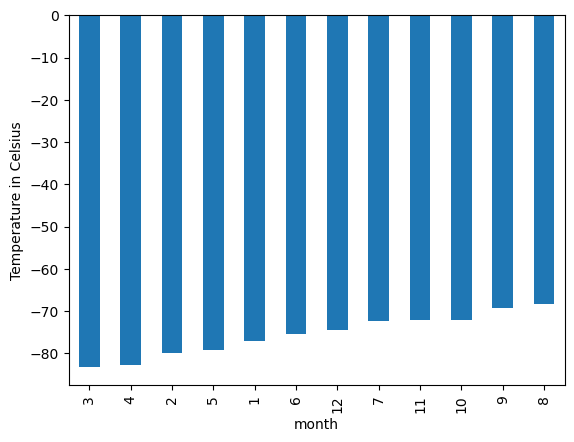

In [27]:
# Plot the average temperature by month
month_avg_low_temp.sort_values().plot(kind='bar')
plt.ylabel('Temperature in Celsius')
plt.show()

In [36]:
# Identify the coldest and hottest months in Curiosity's location

print(month_avg_low_temp.min())
print(month_avg_low_temp.max())


-83.30728912353516
-68.38298034667969


In [34]:
# 4. Average pressure by Martian month
month_avg_pressure = mars_months['pressure'].mean()
month_avg_pressure



month
1     862.488525
2     889.455078
3     877.322937
4     806.329895
5     748.557068
6     745.054443
7     795.105652
8     873.829773
9     913.305969
10    887.312500
11    857.014465
12    842.156616
Name: pressure, dtype: float32

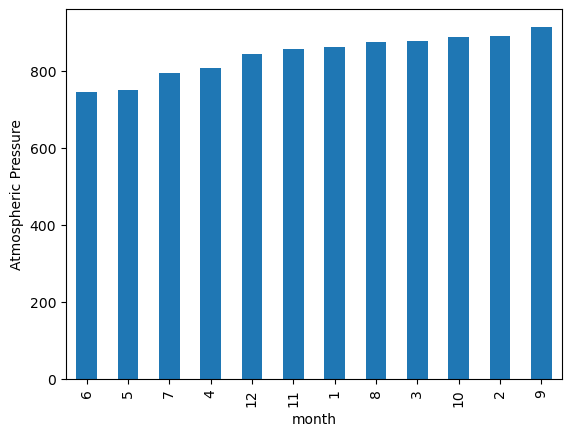

In [32]:
# Plot the average pressure by month

averages_psi = df.groupby('month')['pressure'].mean()
averages_psi
averages_psi.sort_values().plot(kind='bar')
plt.ylabel('Atmospheric Pressure')
plt.show()




In [35]:
# 5. How many terrestrial (earth) days are there in a Martian year?


var = df['terrestrial_date'][924] - df['terrestrial_date'][304]
var.days

686

In [37]:
# Write the data to a CSV

df.to_csv('mission_to_mars_data.csv')

In [38]:
browser.quit()